The recommended dataset for the code below is the celebrity faces dataset and can be obtained from here:
https://tensorport-public-datasets.s3.amazonaws.com/celebA_small.zip

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend('agg') 

Using TensorFlow backend.


In [0]:
!pip install logger
from logger import logger

  Stored in directory: /root/.cache/pip/wheels/91/d4/96/08341e2ac92c1ed4b760e4848e1acda3795f0257a83b94b42e
Successfully built logger


In [0]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend('agg') 

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
import numpy as np
from PIL import Image
import argparse
import math

In [0]:
def generator():
    model = Sequential()
    model.add(Dense(input_dim=100, output_dim=1024))
    model.add(Activation('tanh'))
    model.add(Dense(128*7*7))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Reshape((7, 7, 128), input_shape=(128*7*7,)))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(64, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(32, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(Conv2D(16, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(3, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    return model


def discriminator():
    model = Sequential()
    model.add(
            Conv2D(64, (5, 5),
            padding='same',
            input_shape=(56, 56, 3))
            )
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5)))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('tanh'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [0]:
def stacked_generator_discriminator(D, G):
    D.trainable = False
    model = Sequential()
    model.add(G)
    model.add(D)
    return model

In [0]:
def plot_images(samples=16, step=0):
    #filename = "mnist_%d.png" % step
    noise = np.random.normal(0, 1, (samples, 100))
    images = deprocess(Generator.predict(noise))
    plt.figure(figsize=(5, 5))

    for i in range(images.shape[0]):
        plt.subplot(4, 4, i + 1)
        image = images[i, :, :, :]
        image = np.reshape(image, [56, 56,3])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    #plt.close('all')

In [0]:
from glob import glob
import numpy as np
filenames = np.array(glob('...')) # Path to the folder that contains jpg files

In [0]:
len(filenames)

1000

In [0]:
%matplotlib inline
plt.figure(figsize=(10, 8))
for i in range(20):
    img = plt.imread(filenames[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [0]:
from scipy.misc import imresize
def load_image(filename, size=(56, 56)):
    img = plt.imread(filename)
    # crop
    rows, cols = img.shape[:2]
    crop_r, crop_c = 150, 150
    start_row, start_col = (rows - crop_r) // 2, (cols - crop_c) // 2
    end_row, end_col = rows - start_row, cols - start_row
    img = img[start_row:end_row, start_col:end_col, :]
    # resize
    img = imresize(img, size)
    return img

In [0]:
plt.figure(figsize=(5, 4))
for i in range(20):
    img = load_image(filenames[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [0]:
def preprocess(x):
    return (x/255)*2-1

def deprocess(x):
    return np.uint8((x+1)/2*255)

In [0]:
def plot_images(samples=16, step=0):
    #filename = "mnist_%d.png" % step
    noise = np.random.normal(0, 1, (samples, 100))
    images = deprocess(Generator.predict(noise))
    images = np.clip(images, 0, 255)
    plt.figure(figsize=(10, 10))

    for i in range(images.shape[0]):
        plt.subplot(4, 4, i + 1)
        image = images[i, :, :, :]
        image = np.reshape(image, [56, 56,3])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    #plt.close('all')

In [0]:
from keras.optimizers import RMSprop, SGD, Adam

In [0]:
Generator = generator()
Generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

Discriminator = discriminator()
Discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
[25/Feb/2019 06:06:28] WARNING - From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=1024)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
Discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 56, 56, 64)        4864      
_________________________________________________________________
activation_7 (Activation)    (None, 56, 56, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
__________

In [0]:
stacked_generator_discriminator = stacked_generator_discriminator(Discriminator, Generator)
stacked_generator_discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

In [0]:
len(filenames)

1000

In [0]:
X_train = []
for i in range(len(filenames)):
  X_train.append(preprocess(load_image(filenames[i])))
len(X_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


1000

In [0]:
X_train = np.array(X_train)
X_train.shape

(1000, 56, 56, 3)

In [0]:
save_interval = 1000
batch = 32

In [0]:
stacked_generator_discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 56, 56, 3)         6827427   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 19086209  
Total params: 25,913,636
Trainable params: 6,814,883
Non-trainable params: 19,098,753
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
[25/Feb/2019 06:07:14] WARNING - From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[25/Feb/2019 06:07:18] INFO - epoch: 0, [Discriminator: 0.6799238920211792], [Generator: 0.4593941569328308]


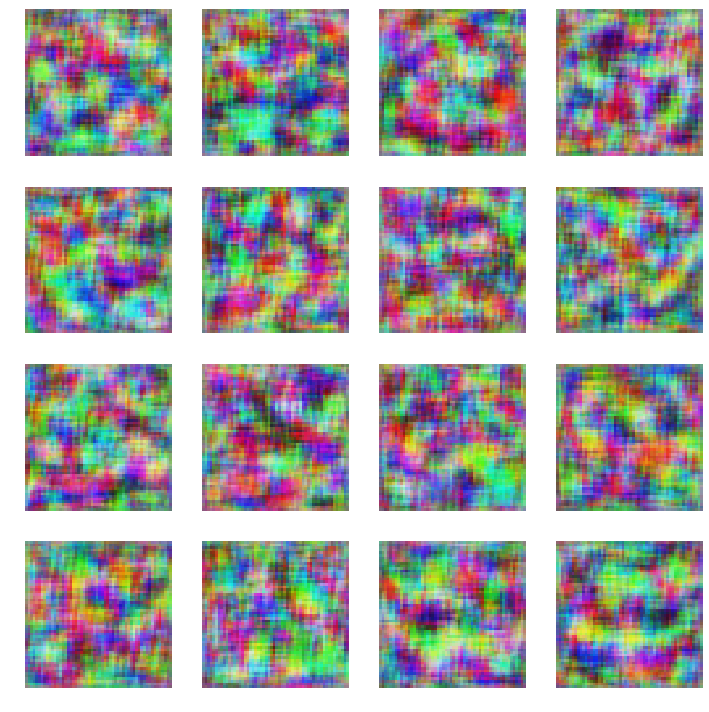

[25/Feb/2019 06:07:19] INFO - epoch: 1, [Discriminator: 0.6522114276885986], [Generator: 6.2852983474731445]
[25/Feb/2019 06:07:19] INFO - epoch: 2, [Discriminator: 0.3339878022670746], [Generator: 7.860539436340332]
[25/Feb/2019 06:07:19] INFO - epoch: 3, [Discriminator: 0.27886754274368286], [Generator: 6.843507289886475]
[25/Feb/2019 06:07:20] INFO - epoch: 4, [Discriminator: 0.06285405904054642], [Generator: 6.781304359436035]
[25/Feb/2019 06:07:20] INFO - epoch: 5, [Discriminator: 0.1356065422296524], [Generator: 6.274637222290039]
[25/Feb/2019 06:07:20] INFO - epoch: 6, [Discriminator: 0.1770307719707489], [Generator: 6.903979301452637]
[25/Feb/2019 06:07:20] INFO - epoch: 7, [Discriminator: 0.012689640745520592], [Generator: 7.0696306228637695]
[25/Feb/2019 06:07:20] INFO - epoch: 8, [Discriminator: 0.2778516113758087], [Generator: 6.287383556365967]
[25/Feb/2019 06:07:20] INFO - epoch: 9, [Discriminator: 0.03906947746872902], [Generator: 5.386058330535889]
[25/Feb/2019 06:07:20

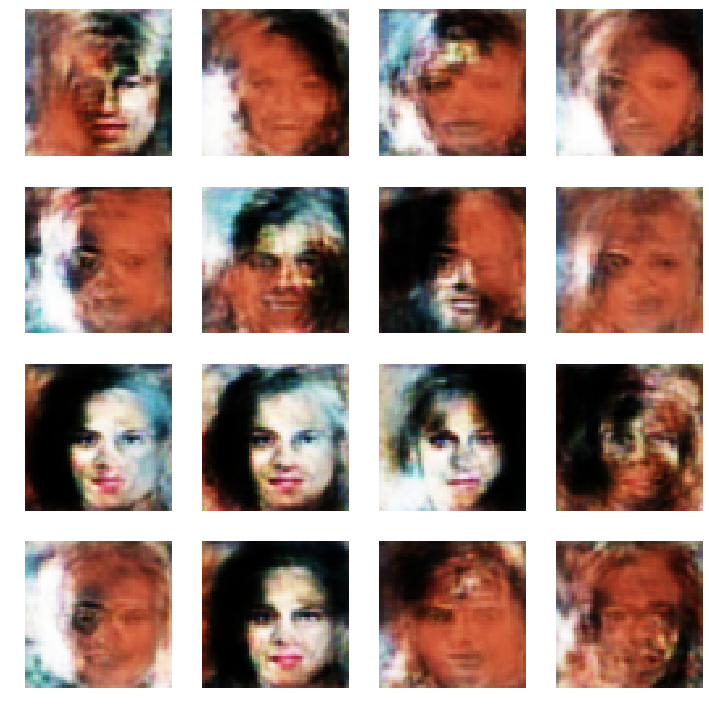

[25/Feb/2019 06:09:03] INFO - epoch: 1001, [Discriminator: 0.3616304397583008], [Generator: 2.6710290908813477]
[25/Feb/2019 06:09:03] INFO - epoch: 1002, [Discriminator: 0.5579332113265991], [Generator: 0.6290284395217896]
[25/Feb/2019 06:09:03] INFO - epoch: 1003, [Discriminator: 0.588645339012146], [Generator: 1.5754700899124146]
[25/Feb/2019 06:09:03] INFO - epoch: 1004, [Discriminator: 0.4464549720287323], [Generator: 1.8644464015960693]
[25/Feb/2019 06:09:03] INFO - epoch: 1005, [Discriminator: 0.42591267824172974], [Generator: 1.6859337091445923]
[25/Feb/2019 06:09:03] INFO - epoch: 1006, [Discriminator: 0.3671051859855652], [Generator: 1.269860029220581]
[25/Feb/2019 06:09:04] INFO - epoch: 1007, [Discriminator: 0.38969117403030396], [Generator: 2.1163463592529297]
[25/Feb/2019 06:09:04] INFO - epoch: 1008, [Discriminator: 0.7895118594169617], [Generator: 1.038977861404419]
[25/Feb/2019 06:09:04] INFO - epoch: 1009, [Discriminator: 0.47086697816848755], [Generator: 0.6705366373

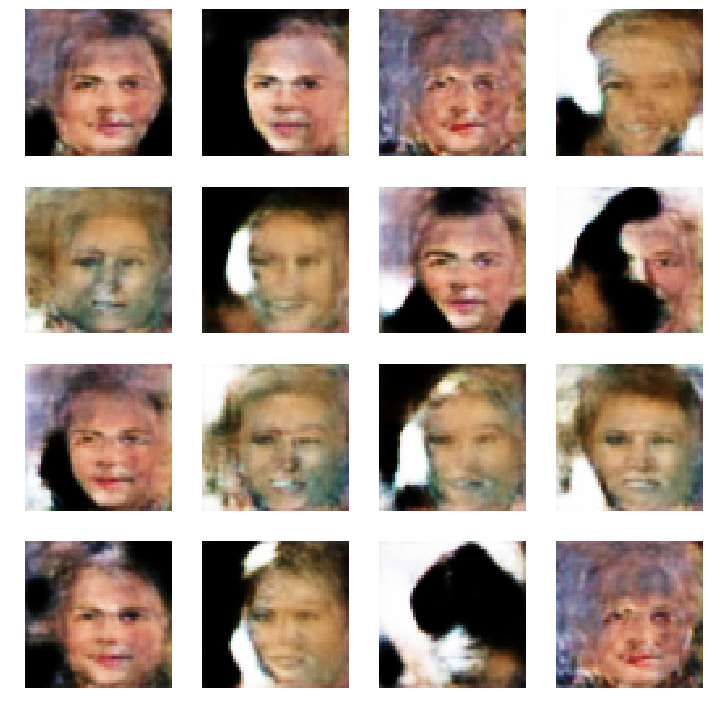

[25/Feb/2019 06:10:47] INFO - epoch: 2001, [Discriminator: 0.4578365683555603], [Generator: 2.052455425262451]
[25/Feb/2019 06:10:47] INFO - epoch: 2002, [Discriminator: 0.4664125442504883], [Generator: 2.242669105529785]
[25/Feb/2019 06:10:47] INFO - epoch: 2003, [Discriminator: 0.53607577085495], [Generator: 0.780579686164856]
[25/Feb/2019 06:10:47] INFO - epoch: 2004, [Discriminator: 0.6694571375846863], [Generator: 1.9243364334106445]
[25/Feb/2019 06:10:47] INFO - epoch: 2005, [Discriminator: 0.45182010531425476], [Generator: 1.5910906791687012]
[25/Feb/2019 06:10:47] INFO - epoch: 2006, [Discriminator: 0.40468233823776245], [Generator: 1.452866554260254]
[25/Feb/2019 06:10:47] INFO - epoch: 2007, [Discriminator: 0.3899960517883301], [Generator: 2.3865504264831543]
[25/Feb/2019 06:10:47] INFO - epoch: 2008, [Discriminator: 0.4670400619506836], [Generator: 1.506756067276001]
[25/Feb/2019 06:10:48] INFO - epoch: 2009, [Discriminator: 0.42909717559814453], [Generator: 1.80701613426208

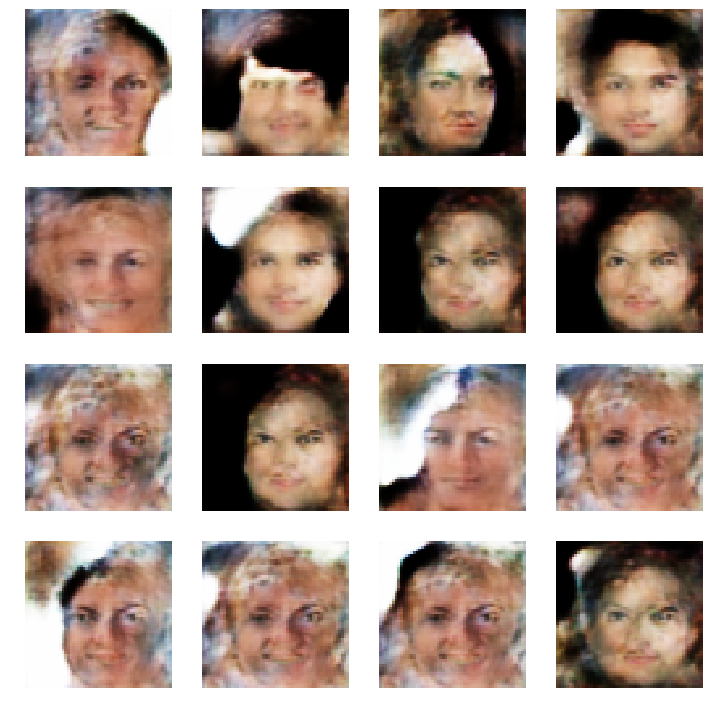

[25/Feb/2019 06:12:30] INFO - epoch: 3001, [Discriminator: 0.38137125968933105], [Generator: 1.432586431503296]
[25/Feb/2019 06:12:31] INFO - epoch: 3002, [Discriminator: 0.6046575307846069], [Generator: 1.6530845165252686]
[25/Feb/2019 06:12:31] INFO - epoch: 3003, [Discriminator: 0.3825170397758484], [Generator: 2.181330680847168]
[25/Feb/2019 06:12:31] INFO - epoch: 3004, [Discriminator: 0.38950058817863464], [Generator: 1.9156029224395752]
[25/Feb/2019 06:12:31] INFO - epoch: 3005, [Discriminator: 0.3827686905860901], [Generator: 1.77347993850708]
[25/Feb/2019 06:12:31] INFO - epoch: 3006, [Discriminator: 0.4491926431655884], [Generator: 2.052886962890625]
[25/Feb/2019 06:12:31] INFO - epoch: 3007, [Discriminator: 0.33917927742004395], [Generator: 3.2452549934387207]
[25/Feb/2019 06:12:31] INFO - epoch: 3008, [Discriminator: 0.7584260106086731], [Generator: 1.2880160808563232]
[25/Feb/2019 06:12:31] INFO - epoch: 3009, [Discriminator: 0.4363866448402405], [Generator: 2.221211433410

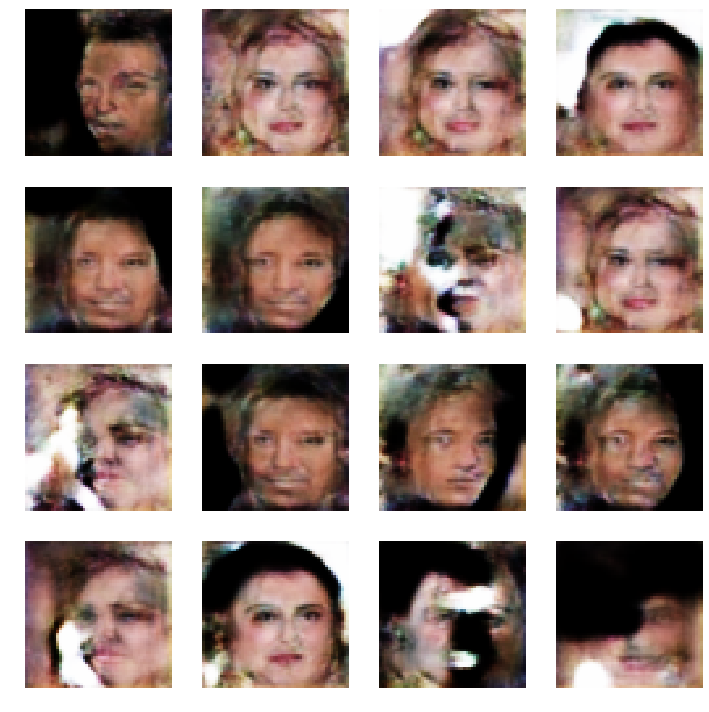

[25/Feb/2019 06:14:14] INFO - epoch: 4001, [Discriminator: 0.3127453029155731], [Generator: 1.6813278198242188]
[25/Feb/2019 06:14:14] INFO - epoch: 4002, [Discriminator: 0.3523406386375427], [Generator: 2.6481497287750244]
[25/Feb/2019 06:14:14] INFO - epoch: 4003, [Discriminator: 0.2877699136734009], [Generator: 2.392054557800293]
[25/Feb/2019 06:14:15] INFO - epoch: 4004, [Discriminator: 0.5483390688896179], [Generator: 1.2795015573501587]
[25/Feb/2019 06:14:15] INFO - epoch: 4005, [Discriminator: 0.4757509231567383], [Generator: 2.0621581077575684]
[25/Feb/2019 06:14:15] INFO - epoch: 4006, [Discriminator: 0.25582581758499146], [Generator: 2.497201919555664]
[25/Feb/2019 06:14:15] INFO - epoch: 4007, [Discriminator: 0.41748204827308655], [Generator: 1.8315584659576416]
[25/Feb/2019 06:14:15] INFO - epoch: 4008, [Discriminator: 0.2752774953842163], [Generator: 2.1610050201416016]
[25/Feb/2019 06:14:15] INFO - epoch: 4009, [Discriminator: 0.3640636205673218], [Generator: 3.4957442283

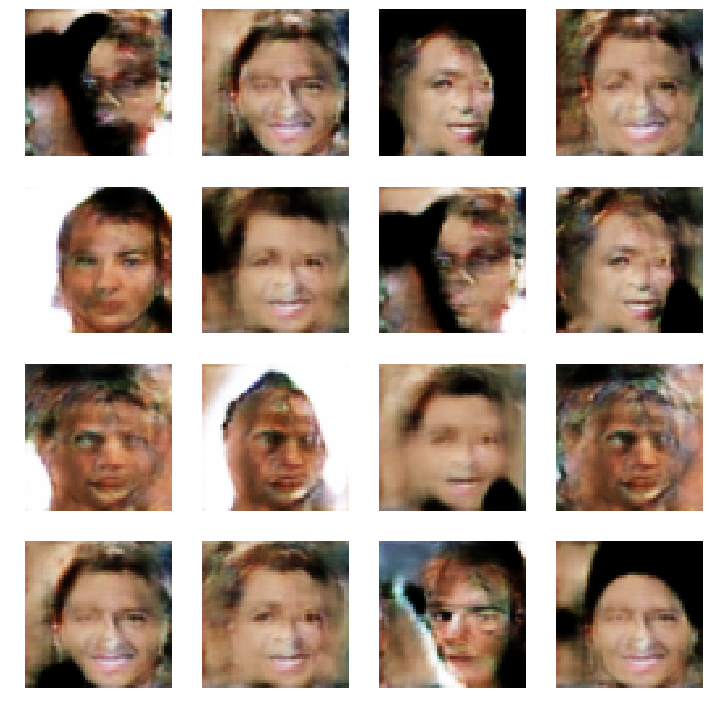

[25/Feb/2019 06:15:58] INFO - epoch: 5001, [Discriminator: 0.2516593933105469], [Generator: 3.297956705093384]
[25/Feb/2019 06:15:58] INFO - epoch: 5002, [Discriminator: 0.3762493133544922], [Generator: 2.174396514892578]
[25/Feb/2019 06:15:58] INFO - epoch: 5003, [Discriminator: 0.3738197684288025], [Generator: 1.7924703359603882]
[25/Feb/2019 06:15:58] INFO - epoch: 5004, [Discriminator: 0.31744903326034546], [Generator: 2.827639579772949]
[25/Feb/2019 06:15:58] INFO - epoch: 5005, [Discriminator: 0.2967846989631653], [Generator: 2.2049834728240967]
[25/Feb/2019 06:15:58] INFO - epoch: 5006, [Discriminator: 0.2975675165653229], [Generator: 2.8243751525878906]
[25/Feb/2019 06:15:58] INFO - epoch: 5007, [Discriminator: 0.2748447060585022], [Generator: 2.3172945976257324]
[25/Feb/2019 06:15:58] INFO - epoch: 5008, [Discriminator: 0.22585701942443848], [Generator: 2.521758556365967]
[25/Feb/2019 06:15:58] INFO - epoch: 5009, [Discriminator: 0.22698114812374115], [Generator: 2.49199485778

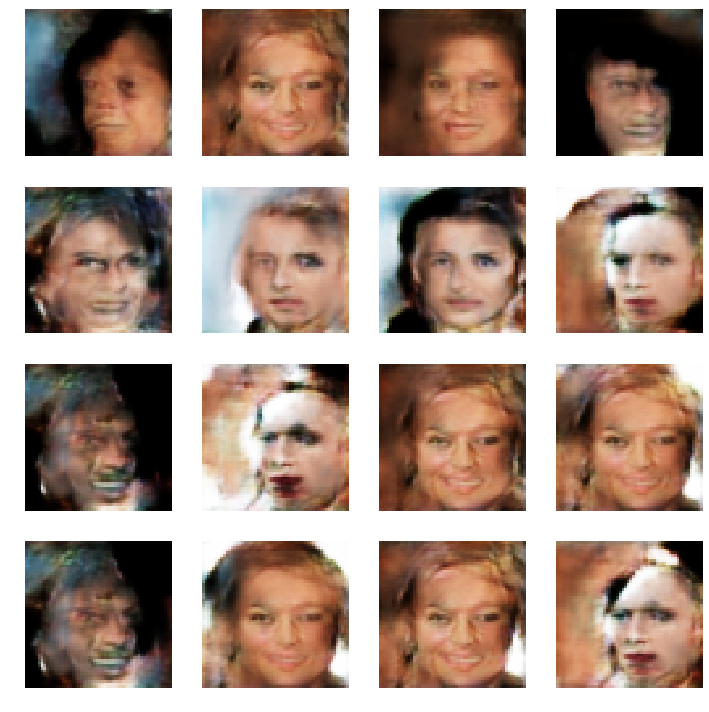

[25/Feb/2019 06:17:41] INFO - epoch: 6001, [Discriminator: 0.19324937462806702], [Generator: 1.9893898963928223]
[25/Feb/2019 06:17:41] INFO - epoch: 6002, [Discriminator: 0.3886472284793854], [Generator: 3.497788429260254]
[25/Feb/2019 06:17:41] INFO - epoch: 6003, [Discriminator: 0.3724709153175354], [Generator: 1.8312734365463257]
[25/Feb/2019 06:17:41] INFO - epoch: 6004, [Discriminator: 0.1722911298274994], [Generator: 2.0269362926483154]
[25/Feb/2019 06:17:41] INFO - epoch: 6005, [Discriminator: 0.1816193163394928], [Generator: 3.3706517219543457]
[25/Feb/2019 06:17:42] INFO - epoch: 6006, [Discriminator: 0.32912349700927734], [Generator: 2.0087549686431885]
[25/Feb/2019 06:17:42] INFO - epoch: 6007, [Discriminator: 0.2989802062511444], [Generator: 1.672641634941101]
[25/Feb/2019 06:17:42] INFO - epoch: 6008, [Discriminator: 0.34629759192466736], [Generator: 3.7167210578918457]
[25/Feb/2019 06:17:42] INFO - epoch: 6009, [Discriminator: 0.41464895009994507], [Generator: 1.87938070

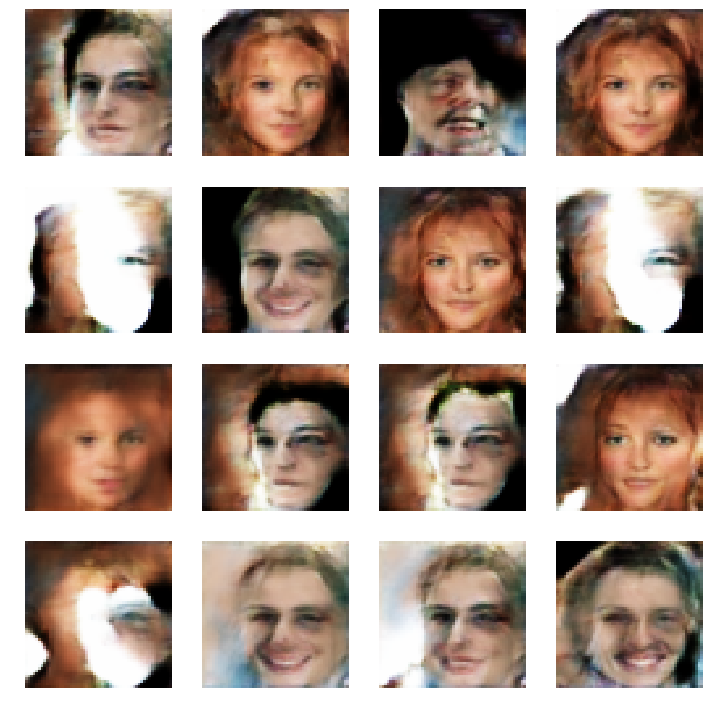

[25/Feb/2019 06:19:24] INFO - epoch: 7001, [Discriminator: 0.2529910206794739], [Generator: 4.021975517272949]
[25/Feb/2019 06:19:25] INFO - epoch: 7002, [Discriminator: 0.33201950788497925], [Generator: 2.367351531982422]
[25/Feb/2019 06:19:25] INFO - epoch: 7003, [Discriminator: 0.15996792912483215], [Generator: 3.226101875305176]
[25/Feb/2019 06:19:25] INFO - epoch: 7004, [Discriminator: 0.19530563056468964], [Generator: 2.378650188446045]
[25/Feb/2019 06:19:25] INFO - epoch: 7005, [Discriminator: 0.11648719012737274], [Generator: 2.3114724159240723]
[25/Feb/2019 06:19:25] INFO - epoch: 7006, [Discriminator: 0.1555643528699875], [Generator: 2.2469778060913086]
[25/Feb/2019 06:19:25] INFO - epoch: 7007, [Discriminator: 0.24683213233947754], [Generator: 2.766289710998535]
[25/Feb/2019 06:19:25] INFO - epoch: 7008, [Discriminator: 0.15057067573070526], [Generator: 2.785109043121338]
[25/Feb/2019 06:19:25] INFO - epoch: 7009, [Discriminator: 0.16029226779937744], [Generator: 2.729572534

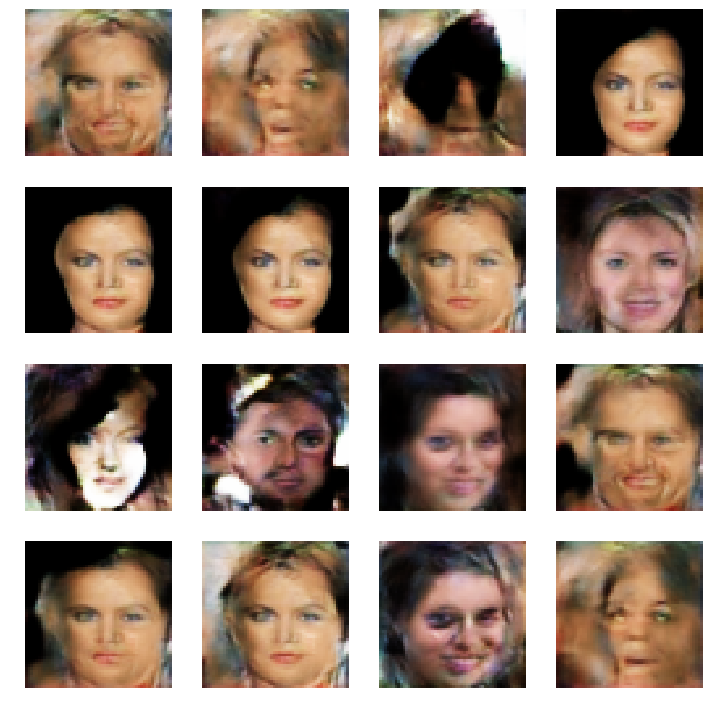

[25/Feb/2019 06:21:08] INFO - epoch: 8001, [Discriminator: 0.16516990959644318], [Generator: 4.8480682373046875]
[25/Feb/2019 06:21:08] INFO - epoch: 8002, [Discriminator: 0.2050628662109375], [Generator: 3.365178108215332]
[25/Feb/2019 06:21:08] INFO - epoch: 8003, [Discriminator: 0.14655283093452454], [Generator: 3.0123419761657715]
[25/Feb/2019 06:21:08] INFO - epoch: 8004, [Discriminator: 0.15023642778396606], [Generator: 2.700319290161133]
[25/Feb/2019 06:21:08] INFO - epoch: 8005, [Discriminator: 0.1361144781112671], [Generator: 3.8366518020629883]
[25/Feb/2019 06:21:08] INFO - epoch: 8006, [Discriminator: 0.12204580008983612], [Generator: 3.382007122039795]
[25/Feb/2019 06:21:09] INFO - epoch: 8007, [Discriminator: 0.13557292520999908], [Generator: 2.4607791900634766]
[25/Feb/2019 06:21:09] INFO - epoch: 8008, [Discriminator: 0.2096811681985855], [Generator: 4.146771430969238]
[25/Feb/2019 06:21:09] INFO - epoch: 8009, [Discriminator: 0.2054058015346527], [Generator: 2.756412029

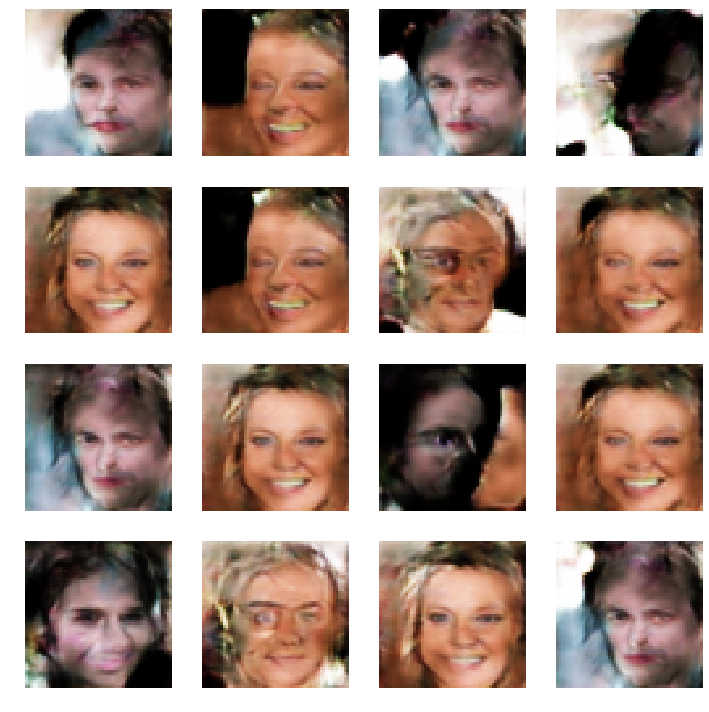

[25/Feb/2019 06:22:51] INFO - epoch: 9001, [Discriminator: 0.12021243572235107], [Generator: 3.4600963592529297]
[25/Feb/2019 06:22:51] INFO - epoch: 9002, [Discriminator: 0.09405340254306793], [Generator: 3.888972759246826]
[25/Feb/2019 06:22:52] INFO - epoch: 9003, [Discriminator: 0.15317590534687042], [Generator: 4.067582130432129]
[25/Feb/2019 06:22:52] INFO - epoch: 9004, [Discriminator: 0.08467192202806473], [Generator: 3.5653858184814453]
[25/Feb/2019 06:22:52] INFO - epoch: 9005, [Discriminator: 0.07907746732234955], [Generator: 3.162867784500122]
[25/Feb/2019 06:22:52] INFO - epoch: 9006, [Discriminator: 0.3470984697341919], [Generator: 1.1641836166381836]
[25/Feb/2019 06:22:52] INFO - epoch: 9007, [Discriminator: 0.560912013053894], [Generator: 6.779577255249023]
[25/Feb/2019 06:22:52] INFO - epoch: 9008, [Discriminator: 0.34723031520843506], [Generator: 5.272132396697998]
[25/Feb/2019 06:22:52] INFO - epoch: 9009, [Discriminator: 0.1934855431318283], [Generator: 3.5933778285

In [0]:
%matplotlib inline
disc_loss = []
gen_loss = []
for cnt in range(10000):

  random_index = np.random.randint(0, len(X_train) - batch / 2)
  legit_images = X_train[random_index: random_index + batch // 2].reshape(batch // 2, 56, 56, 3)
  gen_noise = np.random.normal(0, 1, (batch // 2, 100))
  syntetic_images = Generator.predict(gen_noise)

  x_combined_batch = np.concatenate((legit_images, syntetic_images))
  y_combined_batch = np.concatenate((np.ones((batch // 2, 1)), np.zeros((batch // 2, 1))))

  d_loss = Discriminator.train_on_batch(x_combined_batch, y_combined_batch)

  noise = np.random.normal(0, 1, (batch*2, 100))
  y_mislabled = np.ones((batch*2, 1))

  g_loss = stacked_generator_discriminator.train_on_batch(noise, y_mislabled)

  logger.info('epoch: {}, [Discriminator: {}], [Generator: {}]'.format(cnt, d_loss[0], g_loss))
  disc_loss.append(d_loss[0])
  gen_loss.append(g_loss)
  if cnt % save_interval == 0:
      plot_images(step=cnt)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


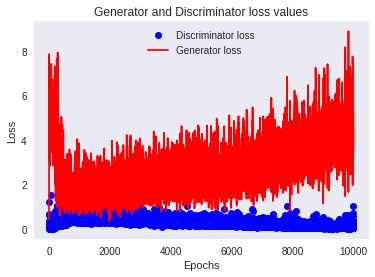

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 10001)
plt.plot(epochs, disc_loss, 'bo', label='Discriminator loss')
plt.plot(epochs, gen_loss, 'r', label='Generator loss')
plt.title('Generator and Discriminator loss values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

In [0]:
syntetic_images.shape

(16, 56, 56, 3)

# Vector arithmetic on faces

In [0]:
gen_noise = np.random.normal(0, 1, (1, 100))

Text(0.5, 1.0, 'Image 1')

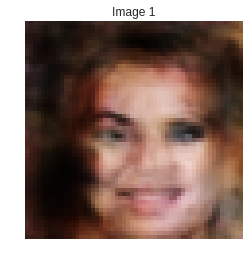

In [0]:
syntetic_images = Generator.predict(gen_noise)
plt.imshow(deprocess(syntetic_images)[0])
plt.axis('off')
plt.title('Image 1')

In [0]:
gen_noise2 = np.random.normal(0, 1, (1, 100))

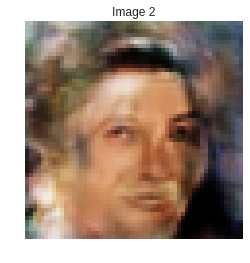

In [0]:
syntetic_images = Generator.predict(gen_noise2)
plt.imshow(deprocess(syntetic_images)[0])
plt.axis('off')
plt.title('Image 2')
plt.show()  

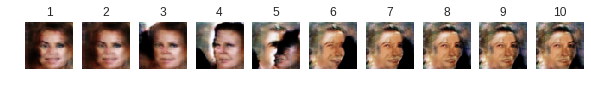

In [0]:
plt.figure(figsize=(10, 8))
for i in range(10):
  gen_noise3 = gen_noise + (gen_noise2 - gen_noise)*(i+1)/10
  syntetic_images = Generator.predict(gen_noise3)
  plt.subplot(1, 10, i+1)
  plt.imshow(deprocess(syntetic_images)[0])
  plt.title(i+1)
  plt.axis('off')

In [0]:
gen_noise3 = np.random.normal(0, 1, (1, 100))

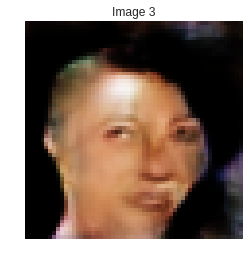

In [0]:
syntetic_images = Generator.predict(gen_noise3)
plt.imshow(deprocess(syntetic_images)[0])
plt.axis('off')
plt.title('Image 3')
plt.show()  

Text(0.5, 1.0, 'Image 3')

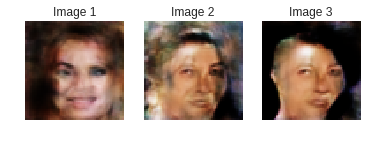

In [0]:
plt.subplot(131)
syntetic_images = Generator.predict(gen_noise)
plt.imshow(deprocess(syntetic_images)[0])
plt.axis('off')
plt.title('Image 1')
plt.subplot(132)
syntetic_images = Generator.predict(gen_noise2)
plt.imshow(deprocess(syntetic_images)[0])
plt.axis('off')
plt.title('Image 2')
plt.subplot(133)
syntetic_images = Generator.predict(gen_noise3)
plt.imshow(deprocess(syntetic_images)[0])
plt.axis('off')
plt.title('Image 3')

In [0]:
gen_noise4 = gen_noise + gen_noise2 - gen_noise3

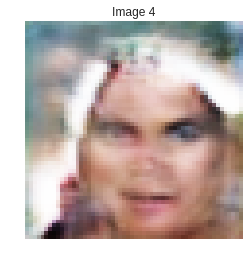

In [0]:
syntetic_images = Generator.predict(gen_noise4)
plt.imshow(deprocess(syntetic_images)[0])
plt.axis('off')
plt.title('Image 4')
plt.show()  